# Dataset

In [47]:
'''
以下方法較適用於大量資料探勘(X):

1.CART決策分類樹的變項是遞迴使用, 先找出有可能是x的變項(X,y polyserial多系列相關using R),而非只根據Pearson組型挑Feature
2.承上,第二種方法是在ML中,大量資料的Feature importance可用KFold去挑出比較好的
3.可把各類較相近的algorithm一起建立def一次計算

'''

'\n以下方法應較適用於大量資料探勘(X):\n\n1.CART決策分類樹的變項是遞迴使用, 先找出有可能是x的變項(X,y polyserial多系列相關using R),而非只根據Pearson組型挑Feature\n2.承上,第二種方法是在ML中,大量資料的Feature importance可用KFold去挑出比較好的\n3.找出各類相近的algorithm可建立def一起算\n\n'

In [19]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.tail()  #本資料只有150筆

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
df.describe()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.corr()     

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


# CART 決策樹

In [22]:
from sklearn.tree import DecisionTreeClassifier  #tree模組中

tree = DecisionTreeClassifier(criterion='gini',max_depth=5)  #launch一個樹物件,不純度參數gini或entropy(可再以R計算Info Gain)
tree.fit(df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']], df[['屬種']]) #資料放進來 
tree #印出各參數

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
from sklearn.tree import export_graphviz  #先輸出dot圖再轉成png圖

export_graphviz(tree, out_file="tree.dot", feature_names= ['Sepal Length','Sepal Width','Petal Length','Petal Width'],               
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])  #把feature和class名稱以list填入圖中

In [28]:
import os  #先裝Graphviz2.38.msi才能把dot轉成png圖, 設PATH環境變數

os.environ['PATH'] = os.environ['PATH'] + (';c:/Program Files (x86)/Graphviz2.38/bin/') # os.environ['PATH']為印出all paths,執行檔在bin目錄下
#!dot -Tpng tree.dot -o tree.png  #tree.dot轉成tree.png  -Tpng

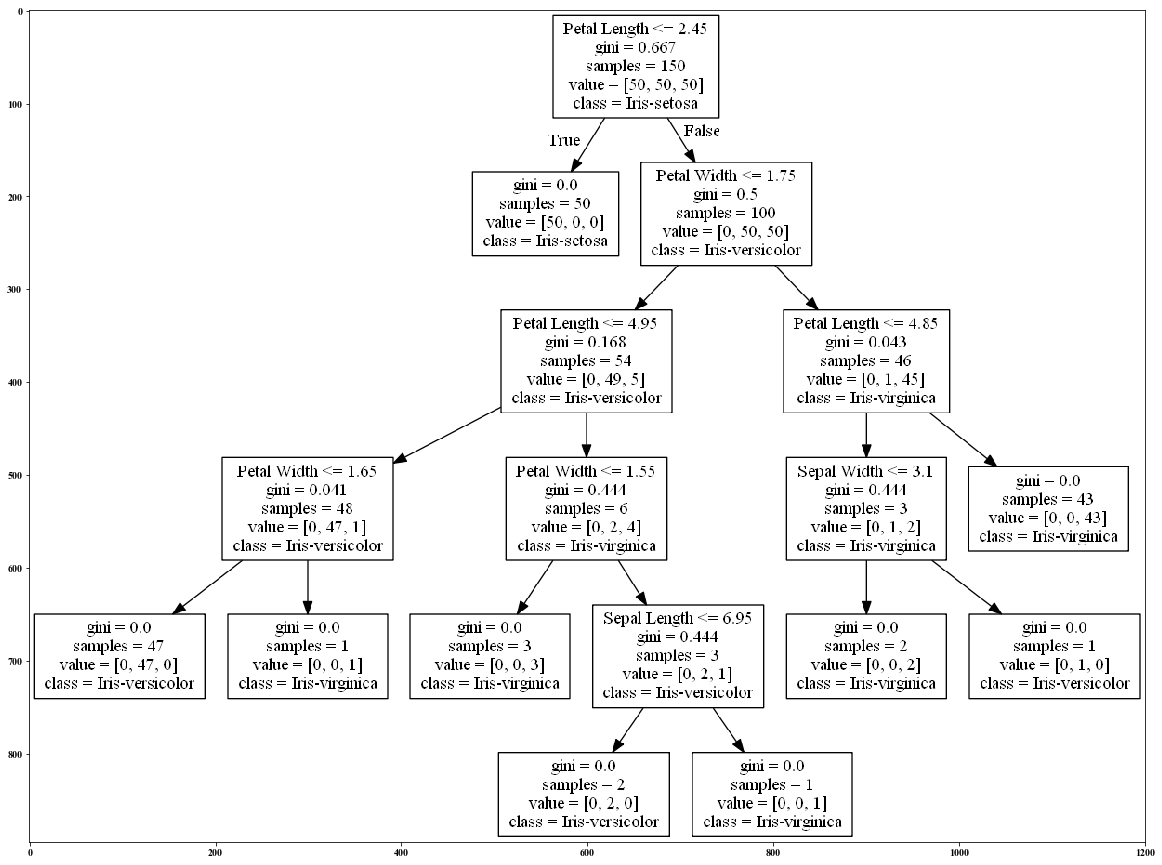

In [25]:
import matplotlib.image as mpimg   #matplotlib img讀取作圖
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Times New Roman'

fig = plt.figure(figsize=(20,16))  #畫布尺寸
img = mpimg.imread('tree.png')
plt.imshow(img)

# Feature importance

In [26]:
tree.feature_importances_  #依x欄位順序呈現feature_importance_, array再轉成list   

array([0.01333333, 0.01333333, 0.55072262, 0.42261071])

In [33]:
df1 = pd.DataFrame({'feature':['Sepal Length','Sepal Width','Petal Length','Petal Width'],'feature_importance':tree.feature_importances_.tolist()})
df1

,feature,feature_importance
0,Sepal Length,0.013333
1,Sepal Width,0.013333
2,Petal Length,0.550723
3,Petal Width,0.422611


In [31]:
df1.index   #是一個RangeIndex物件
#len(df1.index)

RangeIndex(start=0, stop=4, step=1)

In [37]:
#圖上自動標示文字或數值def  
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom') 

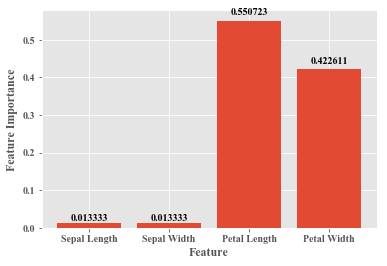

In [44]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(6,4))
bar = plt.bar(df1.index, df1['feature_importance'], align='center')
plt.xlabel('Feature') #X-axis name
plt.ylabel('Feature Importance') #Y-axis name
plt.xticks(df1.index, df1['feature']) #X軸項目名稱

autolabel(bar)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#        xytext=(df.index[i],df['gini_importance'][i]))
#plt.show()

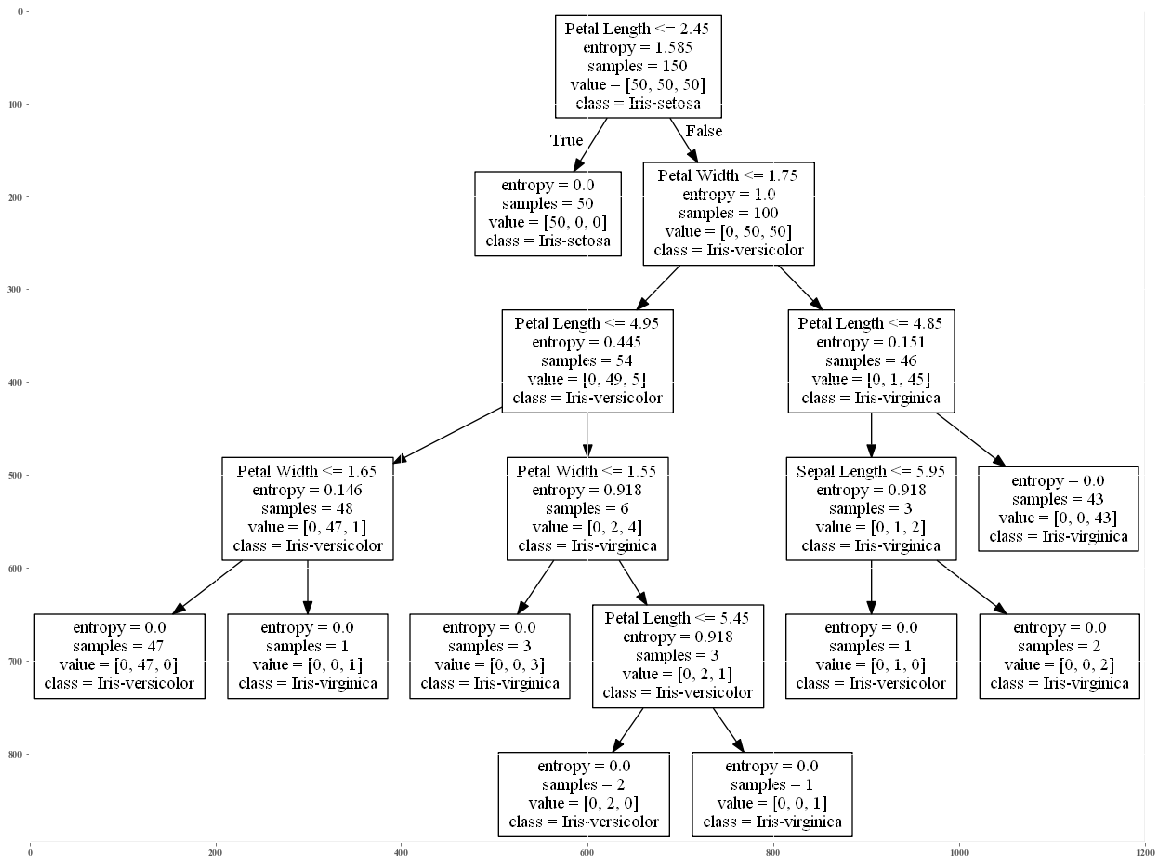

In [41]:
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.image as mpimg   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Times New Roman'

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)   #換不純度參數entropy
tree.fit(df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']], df[['屬種']])  

export_graphviz(tree, out_file="tree_en.dot", feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']) 

!dot -Tpng tree_en.dot -o tree_en.png 

fig = plt.figure(figsize=(20,16)) 
img = mpimg.imread('tree_en.png')
plt.imshow(img)

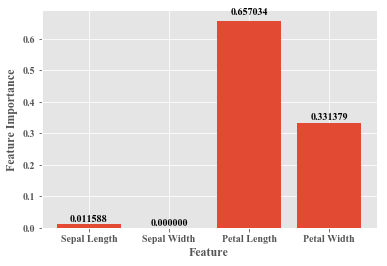

In [45]:
tree.feature_importances_ 
df2 = pd.DataFrame({'feature':['Sepal Length','Sepal Width','Petal Length','Petal Width'],'feature_importance':tree.feature_importances_.tolist()})
fig = plt.figure(figsize=(6,4))
bar = plt.bar(df2.index,df2['feature_importance'],align='center')
plt.xlabel('Feature') 
plt.ylabel('Feature Importance')
plt.xticks(df2.index, df2['feature']) 

autolabel(bar)

# KNN最近鄰, SVC支持向量,  Bayes.....  建立def (just ex)

In [50]:
#切分資料
from sklearn.model_selection import train_test_split

X = df[df.columns[0:4]]  #設定要的x欄位
y = df[df.columns[4]]  #設定y欄位

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)  

In [54]:
#載入模組
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC   #y為continuous使用SVM support vector machine
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
import itertools

#launch演算法物件
knn=  KNeighborsClassifier(n_neighbors=3, weights='uniform')  #或distance
svc = SVC(C=1.0, kernel="rbf")
gnb = GaussianNB()
    
#開始fit資料,並繪製混淆矩陣圖
def model_fit(list):
    for algorithm in list:
        #fit
        algorithm.fit(X_train, y_train) #看一下fit情況
        #metrics
        cnf_matrix = metrics.confusion_matrix(y_train, algorithm.predict(X_train))
        target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  #加入y的類別label
        print(plot_confusion_matrix(cnf_matrix, classes=target_names)) #先執行最下方的備註
        print(metrics.classification_report(y_train, algorithm.predict(X_train)))
        plt.show()
#KFold可再加進來

Confusion matrix, without normalization
[[37  0  0]
 [ 0 41  3]
 [ 0  3 36]]
None
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.93      0.93      0.93        44
 Iris-virginica       0.92      0.92      0.92        39

      micro avg       0.95      0.95      0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



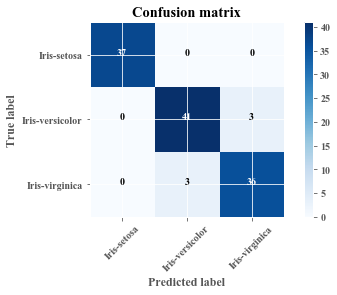

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
[[37  0  0]
 [ 0 43  1]
 [ 0  1 38]]
None
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.98      0.98      0.98        44
 Iris-virginica       0.97      0.97      0.97        39

      micro avg       0.98      0.98      0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



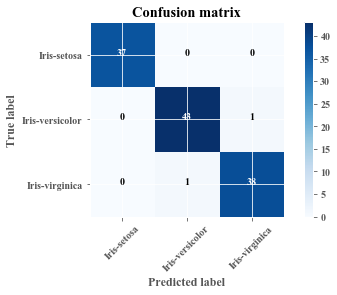

Confusion matrix, without normalization
[[37  0  0]
 [ 0 42  2]
 [ 0  3 36]]
None
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.93      0.95      0.94        44
 Iris-virginica       0.95      0.92      0.94        39

      micro avg       0.96      0.96      0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



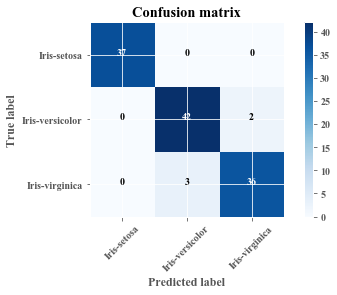

In [55]:
#放入演算法物件list 
list = [knn, svc, gnb]
model_fit(list)

In [53]:
#備註(官網作圖code)

import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py